# MA934 - class 1

You should make at least one commit to your repository per computational task below - usually more.


## Task 1

Make sure that you can run the sample code in main.jl

Add a new function to the module Starter.jl that reads in parameters $\alpha$ and $n$ and produces a log plot of some samples of the function $$f(x) = x^\alpha \, \log(x)$$
at values of $x$ that increase in powers of 2 from 1 to $2^n$. This should only involve minor modifications of the existing code.

In [1]:
push!(LOAD_PATH, pwd())

4-element Array{String,1}:
 "@"
 "@v#.#"
 "@stdlib"
 "/Users/skom/Documents/GitHub/ma934-worksheet-1-skomuro"

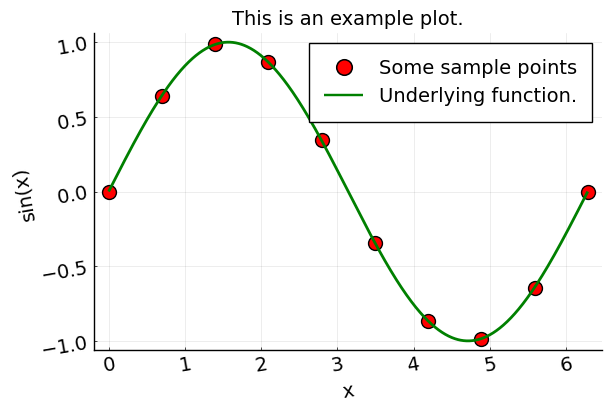

args[group2][parameter3] = 10.0  Type = Float64
args[group2][parameter4] = test.csv  Type = String
args[group1][parameter1] = 10  Type = Int64
args[group1][parameter2] = This is some text  Type = String


In [8]:
include("main.jl")

In [87]:
function task_plot(alpha, n)
    title = "This is a task plot."
    x1 = [ 2^k for k in 1:n]
    y1 = [ x^alpha * log(x) for x in x1]

    # Plot the points
    p1 = plot(x1, y1, seriestype=:scatter,label="Some sample points",
    title=title, xlabel="x", ylabel="x^alpha log(x)", markersize=10, markercolor="red")

    # Now plot the true function
    x2 = [2^k for k in 1:n]
    y2 = [x^alpha * log(x) for x in x2]
    plot!(x2, y2, label="Underlying function.", color="green", linewidth=2)
    
    p2 =  plot(x1, y1, seriestype=:scatter,label="Some sample points",
    title=title, xlabel="x", ylabel="x^¥¥alpha log(x)", markersize=10, markercolor="red", xaxis=:log, yaxis=:log)
    plot!(x2, y2, label="Underlying function.", color="green", linewidth=2, xaxis=:log, yaxis=:log)
    
    return p1, p2
end

task_plot (generic function with 1 method)

In [88]:
p1, p2 = task_plot(5, 5)

(Plot{Plots.PyPlotBackend() n=2}, Plot{Plots.PyPlotBackend() n=2})

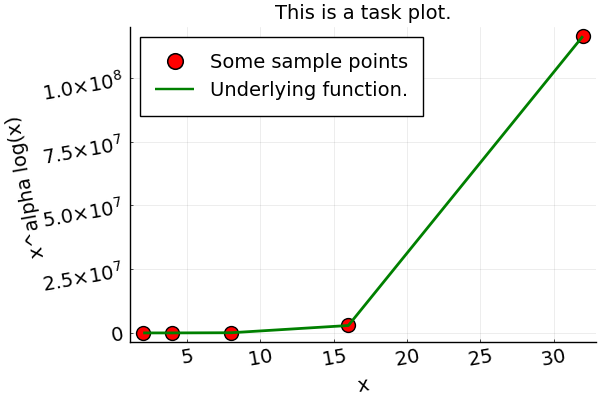

In [89]:
p1

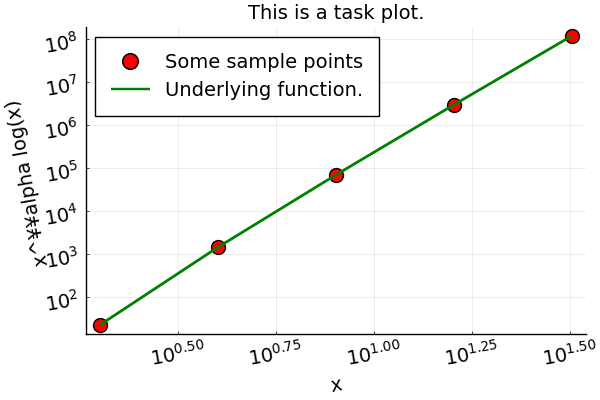

In [90]:
p2

## Task 2

Write a new module containing functions that compute the $n^{th}$ term, $a_n$, in the Fibonacci sequence:
 * Iteratively
 * Recursively
 * Using memoization (hint: use Julia's Dict type for the lookup table)
 
The functions should work starting from any given values of $a_1$ and $a_2$.

Use the BenchmarkTools.jl package to measure the run-time of each of these functions over a range of values of $n$ and produce a plot to illustrate your results.

The recursive function implementation gets slow very quickly - I could only do up to $n=48$ on my laptop. Write a recursion relation for the computational complexity of the recursive version of the task. Solve it to prove that the computational complexity grows exponentially with $n$.

In [50]:
using Fibonacci

┌ Info: Precompiling Fibonacci [top-level]
└ @ Base loading.jl:1278


In [94]:
using BenchmarkTools

┌ Info: Precompiling BenchmarkTools [6e4b80f9-dd63-53aa-95a3-0cdb28fa8baf]
└ @ Base loading.jl:1278


## Task 3

The computational complexity of the naive divide-and-conquer algorithm for matrix multiplication satisfies the functional equation $$F(n) = 8 F(n/2) + 4 (n/2)^2$$ with $F(1)=1$.

The corresponding equation for Strassen multiplication is $$F(n) = 7 F(n/2) + 18 (n/2)^2$$ with $F(1)=1$.

Solve these recurrence relations explicitly to prove that the computational complexity of the two algorithms are $O(n^3)$ and $O(n^{\log_2(7)})$ respectively. 

It is helpful to adopt the change of variables $n=2^p$ with $a_p = F(2^p)$ to obtain linear (albeit inhomogeneous) recursion relations. 

Some helpful online notes about solving recursion relations can be found at:

https://www.tutorialspoint.com/discrete_mathematics/discrete_mathematics_recurrence_relation.htm

To make things simpler, let $$n = 2^p $$

### Divide-and-conquer Algorithm

$$
\begin{eqnarray}
F(n) & = & 8 F(n/2) + 4 (n/2)^2 \\
& = & 8 F(2^{p-1}) + 4 \cdot \left( 2^{p-1} \right)^2 \\
& = & 8 \left( 8 F(2^{p-2}) + 4 \cdot \left( 2^{p-2} \right)^2 \right) + 4 \left( 2^{p-1} \right)^2 \\
& = & 8^p F(1) + \sum_{i=1}^{p} 4 \cdot 8^{p-i} \cdot \left( 2^{i-1} \right)^2 \\
& = & \left( 2^p \right)^3 \cdot 1 + \sum_{i=1}^{p} 2^2 \cdot \left( 2^{p-i} \right)^3 \cdot 2^{2i-2} \\
& = & n^3 +  \sum_{i=1}^{p} 2^{3p - i} \\
& = & O(n^3)
\end{eqnarray}
$$

### Strassen Multiplication

With the same argument with Divide-and-conque algorithm, we get
$$
\begin{eqnarray}
    F(n) & = & 7^p F(1) + \sum_{i=1}^{p-1} 18 \cdot 7^{p-i} \cdot \left( 2^i \right)^2 \\
     & = & \left( 2^p \right)^{ \log_2(7)} + \sum_{i=1}^{p-1} 18 \cdot 7^{p-i} \cdot \left( 2^i \right)^2 \\
     & = & n^{\log_2(7) } + \sum_{i=1}^{p-1} 18 \cdot 7^{p-i} \cdot \left( 2^i \right)^2 \\
     & = & O(\log_2(7))
\end{eqnarray}
$$